In [113]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sys

In [42]:
data = pd.read_csv('/content/Social_Network_Ads.csv') #data değişkenine dataset aktarıldı.

In [43]:
data.shape  #column ve row sayısı gösterildi.

(400, 5)

In [44]:
 data.shape[0]  #row sayısı

400

In [45]:
 data.shape[1]  #column sayısı 

5

In [46]:
data.info()  #dataset hakkında bilgi verildi.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [47]:
data.columns  #column isimleri gösterildi.

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [48]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [49]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [50]:
data.isnull().sum()   #null değer var mı bakıldı.

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [51]:
data.drop("User ID", axis = 1, inplace = True)  #ID sütunundaki değerlerin target değeri için önemi yok.o yüzden kaldırıldı.

In [52]:
data.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


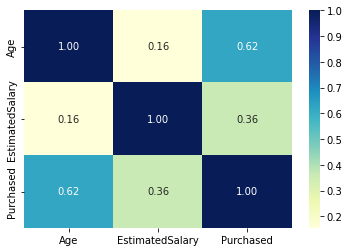

In [53]:
sns.heatmap(data.corr(), annot = True,fmt=".2f", cmap = 'YlGnBu' )
plt.show()

In [57]:
gender = pd.get_dummies(data['Gender'], drop_first=True)   #gender sütunu string değerler barındırır.
                                                       
dataset = pd.concat([gender, data], axis=1)
data.drop(columns=['Gender'], axis=1, inplace=True)

In [91]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [93]:
x = data.iloc[:, [0,1]].values    #Features
y = data.iloc[:, 2].values     #Targets

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0 )

In [118]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)          #feature scaling yapılır.

In [97]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
Acc=[]
for i in range(1,10):
  model_svm = SVC(C=i)
  model_svm.fit(x_train,y_train)
  y_pred = model_svm.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  print("c -->",i,"accuracy score = ",acc)
  Acc.append(acc)    #c değerlerine bakılır.

c --> 1 accuracy score =  0.93
c --> 2 accuracy score =  0.93
c --> 3 accuracy score =  0.93
c --> 4 accuracy score =  0.93
c --> 5 accuracy score =  0.93
c --> 6 accuracy score =  0.93
c --> 7 accuracy score =  0.93
c --> 8 accuracy score =  0.93
c --> 9 accuracy score =  0.93


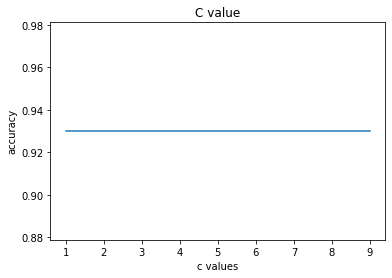

In [98]:
plt.plot(range(1,10),Acc)
plt.xlabel("c values")
plt.ylabel("accuracy")
plt.title("C value")
plt.show()

In [119]:
from sklearn.svm import SVC
 
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

SVC(random_state=1)

In [120]:
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

print accuracy of svm algo:  0.93


In [121]:
y_pred = svm.predict(x_test)  
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [122]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
print(matrix)

[[64  4]
 [ 3 29]]


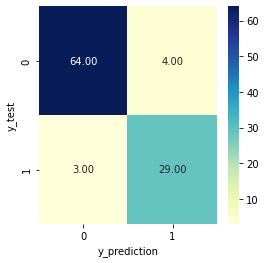

In [123]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [125]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)            #naive bayes fit edilir.

GaussianNB()

In [126]:
y_pred = classifier.predict(x_test)

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc=accuracy_score(y_test, y_pred)
print(acc)                            #test accuracy değeri bulunur.

0.9


In [128]:
matrix=confusion_matrix(y_test, y_pred)
print(matrix)                         #confusion matrix oluşturulur.

[[65  3]
 [ 7 25]]


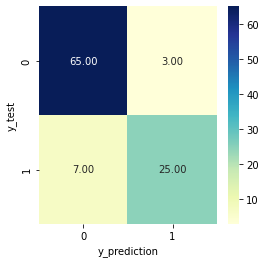

In [129]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()                             #heatmap'te gösterilir.

In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



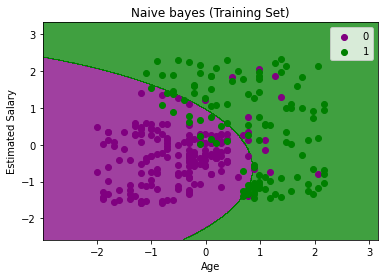

In [143]:
#training set görselleştirilmesi

from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1,step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1,step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha=0.75,cmap=ListedColormap(('purple','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c=ListedColormap(('purple','green'))(i),label=j)
plt.title("Naive bayes (Training Set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

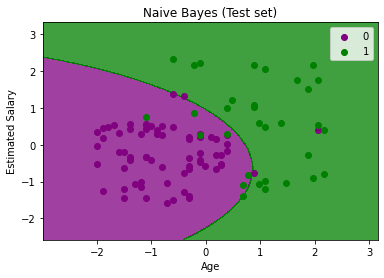

In [144]:
#test set görselleştirilmesi

from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1,step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1,step = 0.01))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show() 